In [13]:
from sklearn.datasets import load_iris
import numpy as np
import matplotlib as plt
import matplotlib.pyplot as plt

In [14]:
iris = load_iris()
iris.data

array([[ 5.1,  3.5,  1.4,  0.2],
       [ 4.9,  3. ,  1.4,  0.2],
       [ 4.7,  3.2,  1.3,  0.2],
       [ 4.6,  3.1,  1.5,  0.2],
       [ 5. ,  3.6,  1.4,  0.2],
       [ 5.4,  3.9,  1.7,  0.4],
       [ 4.6,  3.4,  1.4,  0.3],
       [ 5. ,  3.4,  1.5,  0.2],
       [ 4.4,  2.9,  1.4,  0.2],
       [ 4.9,  3.1,  1.5,  0.1],
       [ 5.4,  3.7,  1.5,  0.2],
       [ 4.8,  3.4,  1.6,  0.2],
       [ 4.8,  3. ,  1.4,  0.1],
       [ 4.3,  3. ,  1.1,  0.1],
       [ 5.8,  4. ,  1.2,  0.2],
       [ 5.7,  4.4,  1.5,  0.4],
       [ 5.4,  3.9,  1.3,  0.4],
       [ 5.1,  3.5,  1.4,  0.3],
       [ 5.7,  3.8,  1.7,  0.3],
       [ 5.1,  3.8,  1.5,  0.3],
       [ 5.4,  3.4,  1.7,  0.2],
       [ 5.1,  3.7,  1.5,  0.4],
       [ 4.6,  3.6,  1. ,  0.2],
       [ 5.1,  3.3,  1.7,  0.5],
       [ 4.8,  3.4,  1.9,  0.2],
       [ 5. ,  3. ,  1.6,  0.2],
       [ 5. ,  3.4,  1.6,  0.4],
       [ 5.2,  3.5,  1.5,  0.2],
       [ 5.2,  3.4,  1.4,  0.2],
       [ 4.7,  3.2,  1.6,  0.2],
       [ 4

In [15]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [16]:
len(iris.data)

150

In [23]:
idx = np.in1d(iris.target, [0, 2])
X = iris.data[idx, 0:2]
y = iris.target[idx]


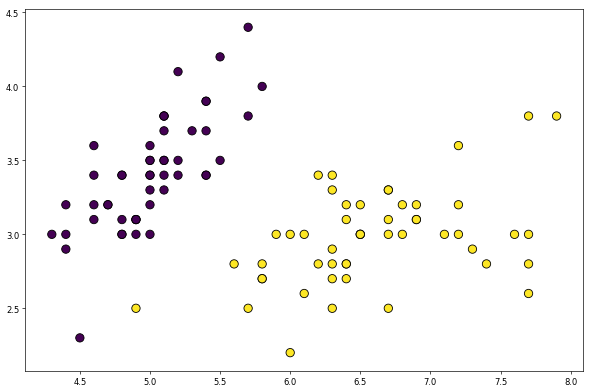

In [24]:
plt.figure(figsize=(12, 8), dpi=60)
plt.scatter(X[:, 0], X[:, 1], c=y, s=100, edgecolor='k')
plt.show()

In [60]:
from sklearn.linear_model import Perceptron

In [61]:
def plot_perceptron(n):
    plt.figure(figsize=(12, 8), dpi=60)
    model = Perceptron(max_iter=n, eta0=0.1, random_state=1).fit(X, y)
    XX_min = X[:, 0].min() - 1; XX_max = X[:, 0].max() + 1;
    YY_min = X[:, 1].min() - 1; YY_max = X[:, 1].max() + 1;
    XX, YY = np.meshgrid(np.linspace(XX_min, XX_max, 1000), np.linspace(YY_min, YY_max, 1000))
    ZZ = model.predict(np.c_[XX.ravel(), YY.ravel()]).reshape(XX.shape)
    cmap = mpl.colors.ListedColormap(sns.color_palette("Set2"))
    plt.contourf(XX, YY, ZZ, cmap=cmap)
    plt.scatter(X[:, 0], X[:, 1], s=50, linewidth=2, edgecolor='k', c=y, cmap=cmap)
    plt.xlim(XX_min, XX_max)
    plt.ylim(YY_min, YY_max)
    plt.grid(False)
    plt.show()

# 직접 구현을 해볼까

input number 를 2개라고 생각해본다. 

In [53]:
class Neuron:

    def __init__(self, w1, w2, b):
        
        self.w1 = w1  # weight 1 가중치 1
        self.w2 = w2  # weight 2 가중치 2
        self.a = 0.1  # alpha - learning rate 회차당 학습적용량 비율
        self.b = b  #  bias 고정값
    
    def feedForword(self, input1, input2):
        
        sigma = self.w1*input1 + self.w2*input2 + self.b #노들의 가중치와 입력치를 곱한 것을 모두 합한다.
        return self.getAct(sigma) #활성화 함수를 판단한다.
    
    def getAct(self, x):
        if x < 0.0: return -1.0
        else: return 1.0
    
    def getActGrad(self, x):
        if x>= 0.0: return 1.0
        else: return -1.0
    
    def propBackword(self,target):
        self.w1=self.w1 - self.a*(self.output-target)*self.getActGrad(self.output)*self.input
        self.w2=self.w2 - self.a*(self.output-target)*self.getActGrad(self.output)*self.input
        self.b=self.b-self.a*(self.oupt-target)*self.getActGrad(self.output)